In [29]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [30]:
from mlxtend.data import loadlocal_mnist


X, y = loadlocal_mnist(images_path="C:/Users/Travis/MNIST/train-images.idx3-ubyte",
                      labels_path="C:/Users/Travis/MNIST/train-labels.idx1-ubyte")

In [31]:
#mnist.data.shape
#X, y = mnist["data"], mnist["target"]

(-0.5, 27.5, 27.5, -0.5)

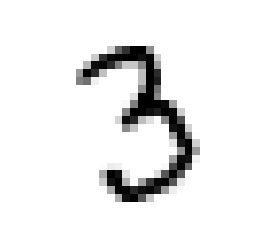

In [32]:
some_digit = X[36000] #9
some_digit2 = X[30000] #?

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")

some_digit_image2 = some_digit2.reshape(28, 28)
plt.imshow(some_digit_image2, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")


In [5]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=1234)

c:\users\travis\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
y_train_even = (y_train % 2 == 0)
y_test_even = (y_test % 2 == 0)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
print("Fitting CLF...")
sgd_clf.fit(X_train, y_train_even)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
from sklearn.model_selection import cross_val_score
print("Cross Validating CLF...")
scr = cross_val_score(sgd_clf, X_test, y_test_even, cv=3, scoring="accuracy")
print("CLF Accuracy Scores: {}".format(scr))

[0.8255  0.8595  0.86925]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neigh =  KNeighborsClassifier(n_neighbors=3)
print("Fitting KNN...")
neigh.fit(X_train,y_train_even)
print("Cross Validating KNN...")
knn_score = cross_val_score(neigh, X_test, y_test_even, cv=2, scoring="accuracy")
print("KNN Accuracy Scores: {}".format(knn_score))

Fitting...
Cross Validation...


array([0.96267289, 0.96499417])

In [40]:
some_digit = [X[36000]] #9
some_digit2 = [X[29000]] #2

SGD Prediction: [False]
KNN Prediction: [False]


(-0.5, 27.5, 27.5, -0.5)

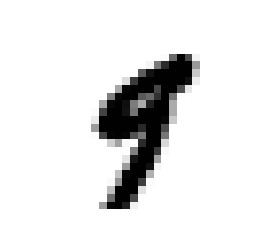

In [41]:
sgd_predict9 = sgd_clf.predict(some_digit)
knn_predict9 = neigh.predict(some_digit)
print("SGD Prediction: {}".format(sgd_predict9[0]))
print("KNN Prediction: {}".format(knn_predict9[0]))

some_digit_image = some_digit[0].reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

SGD Prediction: [ True]
KNN Prediction: [ True]


(-0.5, 27.5, 27.5, -0.5)

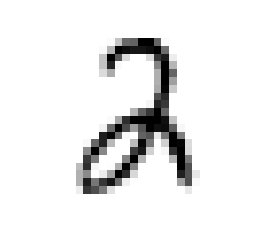

In [42]:
sgd_predict2 = sgd_clf.predict(some_digit2)
knn_predict2 = neigh.predict(some_digit2)
print("SGD Prediction: {}".format(sgd_predict2[0]))
print("KNN Prediction: {}".format(knn_predict2[0]))

some_digit_image2 = some_digit2[0].reshape(28,28)
plt.imshow(some_digit_image2, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")